# Business Analysis - Tesla

## Investigation Overview

For stock investors, especially day-traders, the rate of change in stock prices is an important factor for short-term planning. Even if the degree of change is small, it can be usefully reflected in the stock price prediction model if the variable has statistically convincing evidence.


We presume that correlation perhaps exists, but that is not critical to price change; however, we
want to take advantage of what we found from this analysis and keep applying the underlying
fluctuations and developing the model. Finally, we believe we can get a reliable index in judging
its stock price in its swing.

### Data gathering

We will gather two separate datasets, one for tweets and the other one for the stock price, and then combine those two. The period ranges between November, 2011, and March, 2021. First, we will statistically analyze the completed dataset to select reliable variables and then work on data visualization for exploration. Finally, we will plot the useful variables per different points of view. 

(Limitation) our major question, "Do ELON's tweets affect Tesla's stock price?" may have several different methods to get the most trustful answer depending on each perspective.

 #### Tweet

We will use open source from Kaggle (https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021) which contain the entire tweets since 2010.

In [1]:
# import requried libraries

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import io
import datetime

%matplotlib inline  
# To get the same result from different setup

In [2]:
# download csv files from Kaggle and store those in the same folder where this file is located.
# create a new folder inside of the folder

for year in range(2010, 2022, 1):
    nexty = year+1
    if year == 2021:
        pass
    else:
        print(year, nexty)
        df = pd.concat(map(pd.read_csv, ['./tweet_elon/%d.csv' %year, './tweet_elon/%d.csv' %nexty]), ignore_index=True)

2010 2011
2011 2012
2012 2013
2013 2014
2014 2015
2015 2016
2016 2017
2017 2018
2018 2019
2019 2020
2020 2021


In [3]:
# df.to_csv('tweets.csv')

In [4]:
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1343644462036086785,1343320495127633920,1.609185e+12,2020-12-28 19:46:18,0,NaN,Entertainment will be critical when cars drive...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1343619610617077760,1343386617294295040,1.609179e+12,2020-12-28 18:07:33,0,NaN,@kimpaquette Just meeting with Larry Ellison t...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kimpaquette', 'name': 'Kim P...",NaN,NaN,NaN,NaN
2,2,1343608616960491521,1343576442722893825,1.609176e+12,2020-12-28 17:23:51,0,NaN,@richierichhhhh_ Absolutely,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'richierichhhhh_', 'name': 'R...",NaN,NaN,NaN,NaN
3,3,1343608530998153222,1343320495127633920,1.609176e+12,2020-12-28 17:23:31,0,NaN,What should Tesla do with in-car gaming in an ...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1343431408052662273,1343043963096326147,1.609134e+12,2020-12-28 05:39:42,0,NaN,@PPathole @WSJ Absolutely,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",NaN,NaN,NaN,NaN


In [5]:
# only get required columns

dft = df[['date', 'tweet']]
dft.head()

,date,tweet
0,2020-12-28 19:46:18,Entertainment will be critical when cars drive...
1,2020-12-28 18:07:33,@kimpaquette Just meeting with Larry Ellison t...
2,2020-12-28 17:23:51,@richierichhhhh_ Absolutely
3,2020-12-28 17:23:31,What should Tesla do with in-car gaming in an ...
4,2020-12-28 05:39:42,@PPathole @WSJ Absolutely


In [6]:
dft.shape

(24056, 2)

In [7]:
# adjust the date as yyyy-mm-dd

dft['date'] = pd.to_datetime(dft['date']).dt.date
dft.head()

C:\Users\aicpa\AppData\Local\Temp/ipykernel_12700/1918425870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['date'] = pd.to_datetime(dft['date']).dt.date


,date,tweet
0,2020-12-28,Entertainment will be critical when cars drive...
1,2020-12-28,@kimpaquette Just meeting with Larry Ellison t...
2,2020-12-28,@richierichhhhh_ Absolutely
3,2020-12-28,What should Tesla do with in-car gaming in an ...
4,2020-12-28,@PPathole @WSJ Absolutely


In [8]:
# check the max. number of tweets per a day

dft.date.value_counts()

2020-04-16    112
2018-06-17     98
2017-03-24     98
2019-12-30     94
2020-05-15     88
             ... 
2021-01-05      1
2021-02-02      1
2021-01-03      1
2021-01-01      1
2021-03-16      1
Name: date, Length: 2005, dtype: int64

We want to get two separate dataframe, one for the entire tweets and the other for tweets **excluding retweets**.

In [9]:
# Check if a tweet starts with '@', and then get the index number for True

rev = pd.DataFrame(dft.tweet.str.startswith('@'))
rev = rev.query('tweet == True').index
rev

Int64Index([    1,     2,     4,     5,     7,     8,     9,    10,    11,
               12,
            ...
            23971, 23975, 23988, 24004, 24010, 24011, 24026, 24027, 24028,
            24029],
           dtype='int64', length=16984)

In [10]:
# Remove the indexes

dft1 = dft.drop(index = rev)
dft1.head()  # Tweets excluding retweets

,date,tweet
0,2020-12-28,Entertainment will be critical when cars drive...
3,2020-12-28,What should Tesla do with in-car gaming in an ...
6,2020-12-27,Try playing Polytopia in your Tesla! Great gam...
34,2020-12-25,"Change your horn sound to 🐐, 🐍🎷, 💨 or holiday ..."
35,2020-12-25,Merry Christmas &amp; happy holidays! 🎁 https...


We got tweets excluding retweets here. 

In [11]:
dft.shape

(24056, 2)

In [12]:
dft1.shape

(7072, 2)

- dft = Tweet + Retweet


- dft1 = Tweet 

In [13]:
# group by date to get the number of tweets per a day. 
# Compare the output with the previous cell; dft

tcount_rt = dft.groupby('date').count()
tcount_t = dft1.groupby('date').count()
tcount_rt.reset_index(inplace = True)
tcount_t.reset_index(inplace = True)

In [14]:
tcount_rt.tail(), tcount_t.tail()

(            date  tweet
 2000  2021-03-18      7
 2001  2021-03-19     11
 2002  2021-03-20      6
 2003  2021-03-21     11
 2004  2021-03-22      1,
             date  tweet
 1520  2021-03-16      1
 1521  2021-03-17      1
 1522  2021-03-18      3
 1523  2021-03-19      1
 1524  2021-03-20      1)

- tcount_rt = Tweet + Retweet


- tcount_t = Tweet 

#### Stock Price

We will use a library from Yahoo finance https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f), which contains the entire Nasdaq stock record.

In [15]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"

s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))
companies.head()

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0


In [16]:
# companies.to_csv('companies.csv')

In [17]:
Symbols = companies['Symbol'].tolist()

In [18]:
'TSLA' in Symbols

True

Select stock price data until 3/22/2021 to match with tweet data

In [19]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2021,3,22)

In [20]:
# create empty dataframe to get only TSLA 
stock_final = pd.DataFrame()

try:
    # download the stock price 
    stock = []
    stock = yf.download('TSLA',start=start, end=end, progress=False)

    # append the individual stock prices 
    if len(stock) == 0:
        None
    else:
        stock['Name']='TSLA'
        stock_final = stock_final.append(stock,sort=False)
except Exception:
    None

In [21]:
stock_final.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18783276,TSLA
2010-06-30,25.959999,30.419201,23.299999,23.830000,23.830000,17194394,TSLA
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8216789,TSLA
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5135795,TSLA
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6852634,TSLA


In [22]:
stock_final.shape

(2700, 7)

In [23]:
# get required columns
# change each column name as lowercase to sort for ease
# reset index and data column type

stock = stock_final[['Close', 'Volume']]
stock.reset_index(inplace = True)
stock = stock.rename(columns = {'Date':'date', 'Close':'price', 'Volume':'volume'})
stock['date'] = pd.to_datetime(stock['date']).dt.date
stock.head()

,date,price,volume
0,2010-06-29,23.889999,18783276
1,2010-06-30,23.830000,17194394
2,2010-07-01,21.959999,8216789
3,2010-07-02,19.200001,5135795
4,2010-07-06,16.110001,6852634


Now, we are creating new columns for `price change` and `volume change`.

> *Percentage Change Formula = `(New Value - Original Value) / Original Value x 100`*

In [24]:
price_change = []
for i in range(0,2699,1):
    price_change.append(np.absolute((stock.price[i+1]-stock.price[i])/stock.price[i])*100)

In [25]:
# there are 2 lines having Zero volume.

volume_change = []
for i in range(0,2699,1):
    volume_change.append(np.absolute((stock.volume[i+1]-stock.volume[i])/stock.volume[i])*100)

C:\Users\aicpa\AppData\Local\Temp/ipykernel_12700/666547819.py:5: RuntimeWarning: divide by zero encountered in longlong_scalars
  volume_change.append(np.absolute((stock.volume[i+1]-stock.volume[i])/stock.volume[i])*100)


In [26]:
stock[stock.volume == 0]

,date,price,volume
1317,2015-09-22,260.940002,0
1811,2017-09-07,350.609985,0


In [27]:
stock = stock.iloc[1:]   # because the calculation composes pairs

In [28]:
stock['price_change'] = price_change
stock['volume_change'] = volume_change

In [29]:
stock.head()

,date,price,volume,price_change,volume_change
1,2010-06-30,23.830000,17194394,0.251149,8.459025
2,2010-07-01,21.959999,8216789,7.847255,52.212396
3,2010-07-02,19.200001,5135795,12.568299,37.496326
4,2010-07-06,16.110001,6852634,16.093750,33.428885
5,2010-07-07,15.800000,6924914,1.924273,1.054777


In [30]:
stock.shape

(2699, 5)

In [31]:
tcount_rt.shape

(2005, 2)

In [32]:
tcount_t.shape

(1525, 2)

### Data cleaning

#### Tweet(icld.Retweet) + StockPrice = `df1`

Because stock data contains more lines than tweet data, we will merge tweet data based on stock data, which triggers Null values in some of the combined datasets. Null means no tweet on the day.

In [33]:
# Based on Stock data. (how = 'left')
# We do left join based on Stock data because the number of tweets include Null values, which means no tweet recorded on that day. 

df1 = stock.merge(tcount_rt, left_on = 'date', right_on = 'date', how = 'left')
df1.tail(5)

,date,price,volume,price_change,volume_change,tweet
2694,2021-03-15,707.940002,29423479,2.048351,12.387985,4.0
2695,2021-03-16,676.880005,32195672,4.387377,9.421704,1.0
2696,2021-03-17,701.809998,40372453,3.683074,25.397143,3.0
2697,2021-03-18,653.159973,33369022,6.932079,17.347053,7.0
2698,2021-03-19,654.869995,42893978,0.261808,28.544307,11.0


In [34]:
df1.shape

(2699, 6)

In [35]:
# exclude the first half year becase of NaN for tweet during the period

df1 = df1[350:]
df1.head()

,date,price,volume,price_change,volume_change,tweet
350,2011-11-16,34.939999,1833136,2.976712,105.761108,NaN
351,2011-11-17,33.680000,1349265,3.606177,26.395805,NaN
352,2011-11-18,32.599998,902729,3.206656,33.094759,NaN
353,2011-11-21,31.760000,1031524,2.576682,14.267294,NaN
354,2011-11-22,32.070000,732518,0.976069,28.986820,NaN


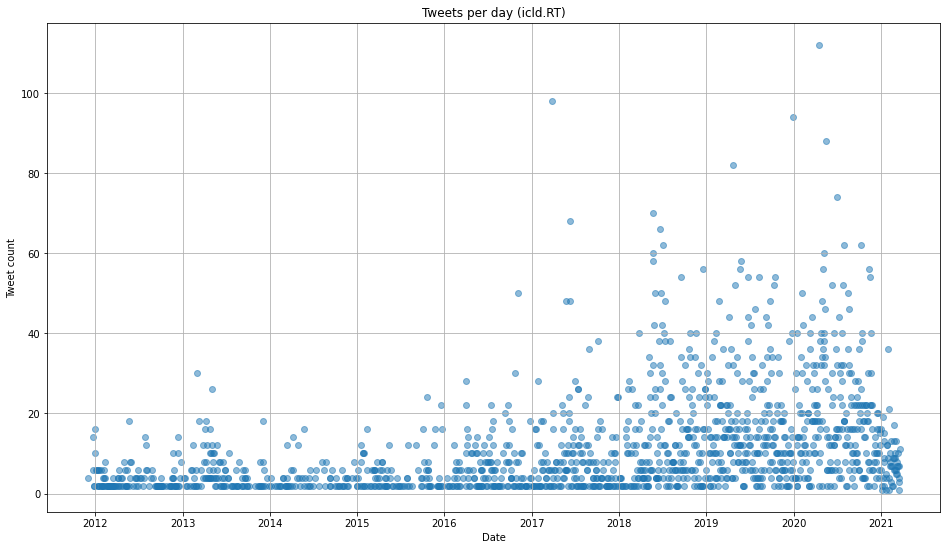

In [36]:
plt.figure(figsize = (16,9))

plt.scatter(data = df1, x = 'date', y = 'tweet', alpha = 0.5)
plt.title('Tweets per day (icld.RT)')
plt.xlabel('Date')
plt.ylabel('Tweet count')
plt.grid(axis='x')
plt.grid(axis='y')

#### Tweet(icld.Retweet) x 99% + StockPrice = `df1r`

Get rid of outliers out of 99% percentile, and store it to a new variable, `df1r`.

In [37]:
r = np.percentile(df1.dropna().tweet, 99)
r

58.0

In [38]:
df1r = df1[df1.tweet < r]
df1r.max()

date             2021-03-19
price            887.059998
volume            194926810
price_change      78.540806
volume_change           inf
tweet                  56.0
dtype: object

Because we set a condition on the number of tweets at 99% percentile, or 58, the maximum value in the sorted sample shows 56.

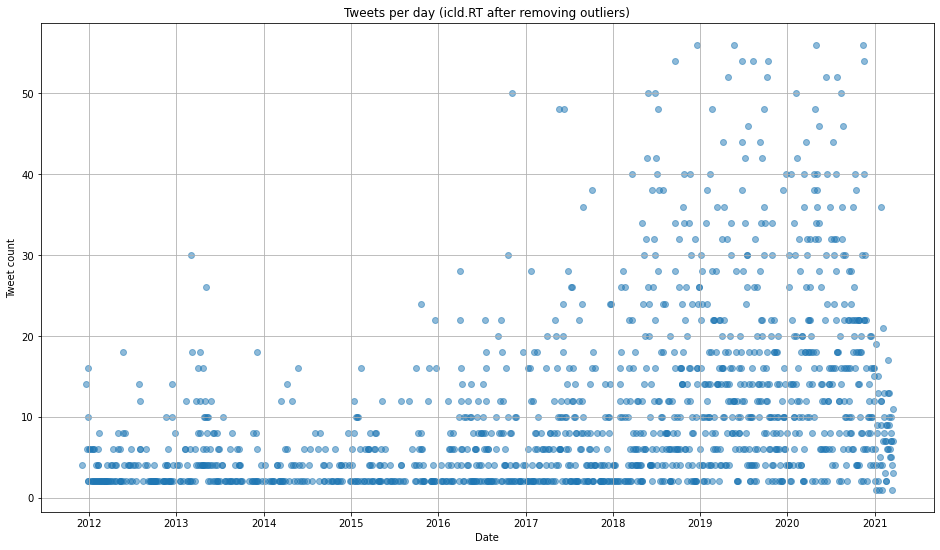

In [39]:
plt.figure(figsize = (16,9))

plt.scatter(data = df1r, x = 'date', y = 'tweet', alpha = 0.5)
plt.title('Tweets per day (icld.RT after removing outliers)')
plt.xlabel('Date')
plt.ylabel('Tweet count')
plt.grid(axis='x')
plt.grid(axis='y')

#### Tweet(excl.Retweet) + StockPrice = `df2`

Get rid of Retweets from df1, and store it to a new variable, `df2`.

In [40]:
df2 = stock.merge(tcount_t, left_on = 'date', right_on = 'date', how = 'left')
df2.tail(5)

,date,price,volume,price_change,volume_change,tweet
2694,2021-03-15,707.940002,29423479,2.048351,12.387985,1.0
2695,2021-03-16,676.880005,32195672,4.387377,9.421704,1.0
2696,2021-03-17,701.809998,40372453,3.683074,25.397143,1.0
2697,2021-03-18,653.159973,33369022,6.932079,17.347053,3.0
2698,2021-03-19,654.869995,42893978,0.261808,28.544307,1.0


In [41]:
df2.shape

(2699, 6)

In [42]:
df2 = df2[350:]
df2.head()

,date,price,volume,price_change,volume_change,tweet
350,2011-11-16,34.939999,1833136,2.976712,105.761108,NaN
351,2011-11-17,33.680000,1349265,3.606177,26.395805,NaN
352,2011-11-18,32.599998,902729,3.206656,33.094759,NaN
353,2011-11-21,31.760000,1031524,2.576682,14.267294,NaN
354,2011-11-22,32.070000,732518,0.976069,28.986820,NaN


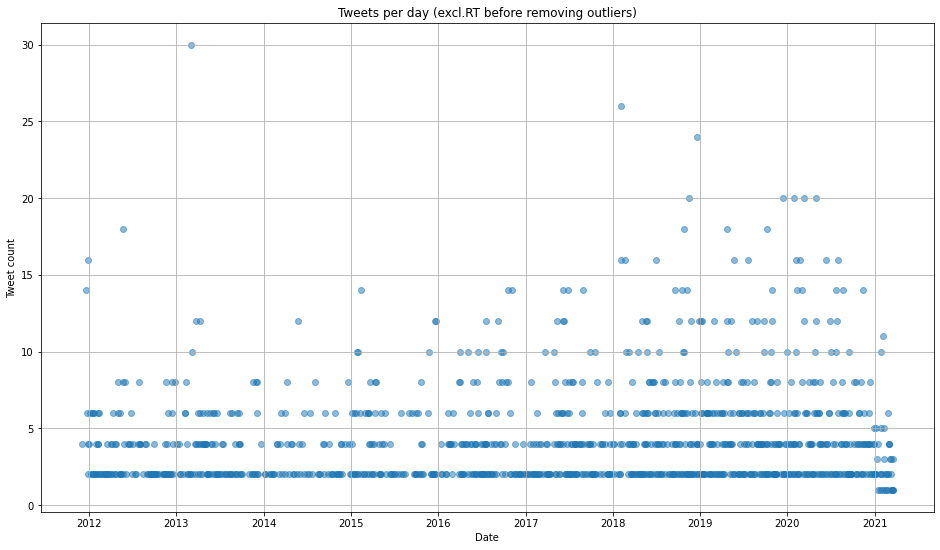

In [43]:
plt.figure(figsize = (16,9))

plt.scatter(data = df2, x = 'date', y = 'tweet', alpha = 0.5)
plt.title('Tweets per day (excl.RT before removing outliers)')
plt.xlabel('Date')
plt.ylabel('Tweet count')
plt.grid(axis='x')
plt.grid(axis='y')

#### Tweet(excl.Retweet) x 99% + StockPrice = `df2r`

Get rid of outliers out of 99% percentile, and store it to a new variable, `df2r`.

In [44]:
r = np.percentile(df2.dropna().tweet, 99)
r

18.0

In [45]:
df2r = df2[df2.tweet < r]
df2r.max()

date             2021-03-19
price            887.059998
volume            152882555
price_change      24.402862
volume_change           inf
tweet                  16.0
dtype: object

Because we set a condition on the number of tweets at 99% percentile, or 18, the maximum value in the sorted sample shows 16.

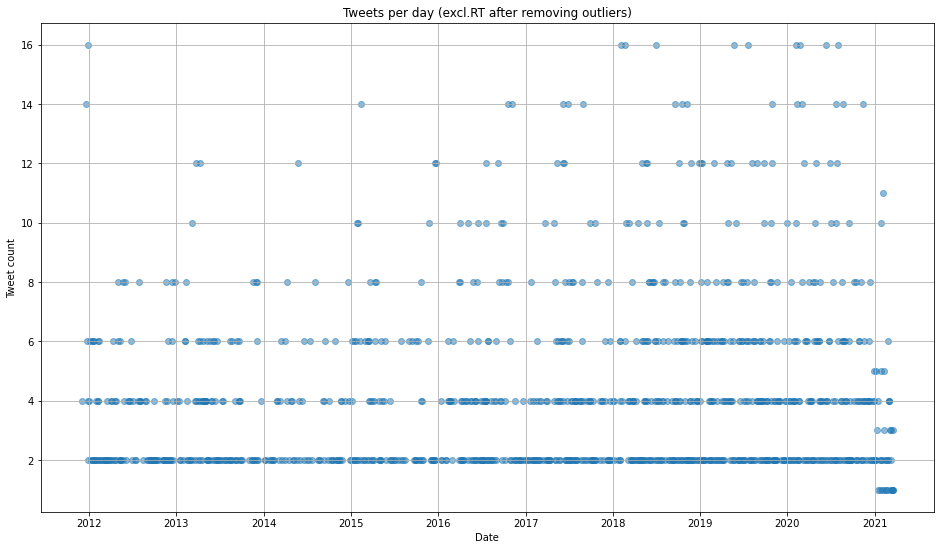

In [46]:
plt.figure(figsize = (16,9))

plt.scatter(data = df2r, x = 'date', y = 'tweet', alpha = 0.5)
plt.title('Tweets per day (excl.RT after removing outliers)')
plt.xlabel('Date')
plt.ylabel('Tweet count')
plt.grid(axis='x')
plt.grid(axis='y')

> `df1` = Stock price + Tweets with Retweet

> `df1r` = Stock price + Tweets with Retweet x **99%**

> `df2` = Stock price + Tweets **without** Retweet

> `df2r` = Stock price + Tweets **without** Retweet x **99%**

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 350 to 2698
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2349 non-null   object 
 1   price          2349 non-null   float64
 2   volume         2349 non-null   int64  
 3   price_change   2349 non-null   float64
 4   volume_change  2349 non-null   float64
 5   tweet          1404 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 128.5+ KB


In [48]:
df1r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 360 to 2698
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1388 non-null   object 
 1   price          1388 non-null   float64
 2   volume         1388 non-null   int64  
 3   price_change   1388 non-null   float64
 4   volume_change  1388 non-null   float64
 5   tweet          1388 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 75.9+ KB


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 350 to 2698
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2349 non-null   object 
 1   price          2349 non-null   float64
 2   volume         2349 non-null   int64  
 3   price_change   2349 non-null   float64
 4   volume_change  2349 non-null   float64
 5   tweet          1073 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 128.5+ KB


In [50]:
df2r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 360 to 2698
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1061 non-null   object 
 1   price          1061 non-null   float64
 2   volume         1061 non-null   int64  
 3   price_change   1061 non-null   float64
 4   volume_change  1061 non-null   float64
 5   tweet          1061 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 58.0+ KB


In [51]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

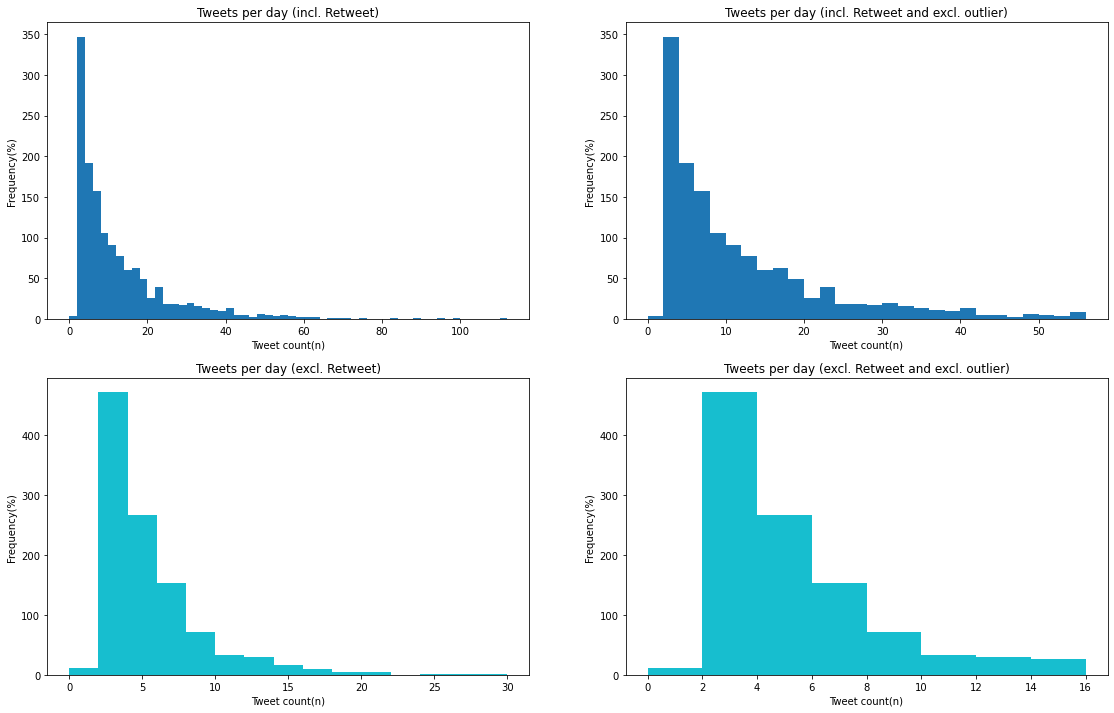

In [52]:
plt.figure(figsize = (19,12))

plt.subplot(2,2,1)

bins = np.arange(0, df1.tweet.max()+1, 2)
plt.hist(data = df1, x = 'tweet', bins = bins, color = sb.color_palette()[0]);
plt.title('Tweets per day (incl. Retweet)')
plt.xlabel('Tweet count(n)')
plt.ylabel('Frequency(%)')

plt.subplot(2,2,2)
bins = np.arange(0, df1r.tweet.max()+1, 2)
plt.hist(data = df1r, x = 'tweet', bins = bins, color = sb.color_palette()[0]);
plt.title('Tweets per day (incl. Retweet and excl. outlier)')
plt.xlabel('Tweet count(n)')
plt.ylabel('Frequency(%)')

plt.subplot(2,2,3)
bins = np.arange(0, df2.tweet.max()+1, 2)
plt.hist(data = df2, x = 'tweet', bins = bins, color = sb.color_palette()[9]);
plt.title('Tweets per day (excl. Retweet)')
plt.xlabel('Tweet count(n)')
plt.ylabel('Frequency(%)')

plt.subplot(2,2,4)
bins = np.arange(0, df2r.tweet.max()+1, 2)
plt.hist(data = df2r, x = 'tweet', bins = bins, color = sb.color_palette()[9]);
plt.title('Tweets per day (excl. Retweet and excl. outlier)')
plt.xlabel('Tweet count(n)')
plt.ylabel('Frequency(%)')

plt.show();

### Statistical analysis

#### Five-number summary

In [53]:
df1[['price_change', 'tweet']].describe()

,price_change,tweet
count,2349.000000,1404.000000
mean,2.421608,11.776353
std,3.057158,12.888462
min,0.000000,1.000000
25%,0.705341,3.750000
50%,1.685965,8.000000
75%,3.063293,16.000000
max,78.540806,112.000000


In [54]:
df1r[['price_change', 'tweet']].describe()

,price_change,tweet
count,1388.000000,1388.000000
mean,2.628929,11.066282
std,3.578945,10.989931
min,0.000000,1.000000
25%,0.730134,2.000000
50%,1.705714,6.500000
75%,3.309448,16.000000
max,78.540806,56.000000


In [55]:
df2[['price_change', 'tweet']].describe()

,price_change,tweet
count,2349.000000,1073.000000
mean,2.421608,4.502330
std,3.057158,3.505093
min,0.000000,1.000000
25%,0.705341,2.000000
50%,1.685965,4.000000
75%,3.063293,6.000000
max,78.540806,30.000000


In [56]:
df2r[['price_change', 'tweet']].describe()

,price_change,tweet
count,1061.000000,1061.000000
mean,2.602758,4.315740
std,2.974777,3.026803
min,0.000000,1.000000
25%,0.720538,2.000000
50%,1.701565,4.000000
75%,3.358026,6.000000
max,24.402862,16.000000


#### Correlation coefficient

In [57]:
df1[['price_change', 'tweet']].corr()

,price_change,tweet
price_change,1.00000,0.06664
tweet,0.06664,1.00000


In [58]:
df1r[['price_change', 'tweet']].corr()

,price_change,tweet
price_change,1.000000,0.082436
tweet,0.082436,1.000000


In [59]:
df2[['price_change', 'tweet']].corr()

,price_change,tweet
price_change,1.000000,0.027733
tweet,0.027733,1.000000


In [60]:
df2r[['price_change', 'tweet']].corr()

,price_change,tweet
price_change,1.000000,0.028704
tweet,0.028704,1.000000


- Compared with Tweet, Volume has the highest correlation. 
- Because we will not check the multi-regression model, we disregard multicollinearity between variables here.

#### R-squared, slope, intercept, p-value, and etc.

In [61]:
#fitting the attributes

import statsmodels.api as sm
df1_rm = df1.copy()
df1_rm.dropna(inplace = True)
df1_rm['intercept'] = 1
df1_rm.shape

(1404, 7)

In [62]:
df1r_rm = df1r.copy()
df1r_rm.dropna(inplace = True)
df1r_rm['intercept'] = 1
df1r_rm.shape

(1388, 7)

In [63]:
df2_rm = df2.copy()
df2_rm.dropna(inplace = True)
df2_rm['intercept'] = 1
df2_rm.shape

(1073, 7)

In [64]:
df2r_rm = df2r.copy()
df2r_rm.dropna(inplace = True)
df2r_rm['intercept'] = 1
df2r_rm.shape

(1061, 7)

 **Ordinary Least Squares**

In [65]:
lm = sm.OLS(df1_rm['price_change'], df1_rm[['intercept', 'tweet']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_change   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.254
Date:                Sat, 11 Dec 2021   Prob (F-statistic):             0.0125
Time:                        21:17:51   Log-Likelihood:                -3773.2
No. Observations:                1404   AIC:                             7550.
Df Residuals:                    1402   BIC:                             7561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4089      0.129     18.723      0.000       2.156       2.661
tweet          0.0184      0.007      2.501      0.013       0.004       0.033
==============================================================================
Omnibus:                     2089.369   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1358226.642
Skew:                           8.459   Prob(JB):                         0.00
Kurtosis:                     154.431   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
lm = sm.OLS(df1r_rm['price_change'], df1r_rm[['intercept', 'tweet']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_change   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     9.483
Date:                Sat, 11 Dec 2021   Prob (F-statistic):            0.00211
Time:                        21:17:51   Log-Likelihood:                -3734.0
No. Observations:                1388   AIC:                             7472.
Df Residuals:                    1386   BIC:                             7483.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3318      0.136     17.154      0.000       2.065       2.599
tweet          0.0268      0.009      3.079      0.002       0.010       0.044
==============================================================================
Omnibus:                     2067.174   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1342171.400
Skew:                           8.468   Prob(JB):                         0.00
Kurtosis:                     154.396   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
lm = sm.OLS(df2_rm['price_change'], df2_rm[['intercept', 'tweet']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8244
Date:                Sat, 11 Dec 2021   Prob (F-statistic):              0.364
Time:                        21:17:51   Log-Likelihood:                -2693.4
No. Observations:                1073   AIC:                             5391.
Df Residuals:                    1071   BIC:                             5401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5022      0.148     16.887      0.000       2.211       2.793
tweet          0.0236      0.026      0.908      0.364      -0.027       0.075
==============================================================================
Omnibus:                      677.169   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6902.135
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      14.066   Cond. No.                         9.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
lm = sm.OLS(df2r_rm['price_change'], df2r_rm[['intercept', 'tweet']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8733
Date:                Sat, 11 Dec 2021   Prob (F-statistic):              0.350
Time:                        21:17:51   Log-Likelihood:                -2661.2
No. Observations:                1061   AIC:                             5326.
Df Residuals:                    1059   BIC:                             5336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4810      0.159     15.593      0.000       2.169       2.793
tweet          0.0282      0.030      0.934      0.350      -0.031       0.087
==============================================================================
Omnibus:                      676.495   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7070.134
Skew:                           2.853   Prob(JB):                         0.00
Kurtosis:                      14.286   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- `Stock price change(%) = β0 + β1*tweet`


- df1r has the highest R-squared value. 
- df1r has the smallest P-value in a slope. df1, df2, df2r have P-value that exceeds the alpha value, typically 0.1 or less, which that means df1r has more reliable slope(tweet) than the others.


- We assume our critical value(α) in this analysis at 0.01 or 1%. 
- H0:β0 = 0 vs H1: β0 ≠ 0 and H0:β1 = 0 vs H1: β1 ≠ 0 
- The p-value of the slope in df1r has less than our critical value(0.01 or 1%), which suggest that the number of tweet in df1r is statistically significant in relating to the stock price change. 


- Based on **df1r**, `StockPricePhange(%) = 2.3318 + 0.0268tweet`	
- The predicted stock price change(%) is equal to 2.3318 plus 0.0268 times the number of tweets.
- If there is no tweeting, we would predict that the stock price has about 2.3318% change on average.
- Every one unit increase in the number of tweet, we would predict that the stock price would change by 0.0268%. 


- However, because the R-squared is really small, 0.007, 0.7% of the variability in the stock price change is explained by the number of tweets, in other words the remaining 99.3% of the variability, is due to characteristics of the stock price change that are not the number of tweets. 

> Many feel that R-squared isn't a great measure (which is possibly true), but I would argue that using cross-validation can assist us with validating any measure that helps us understand the fit of a model to our data. Here, you can find one such argument explaining why one individual doesn't care for R-squared. https://data.library.virginia.edu/is-r-squared-useless/

### Data visualization

#### Tweet count

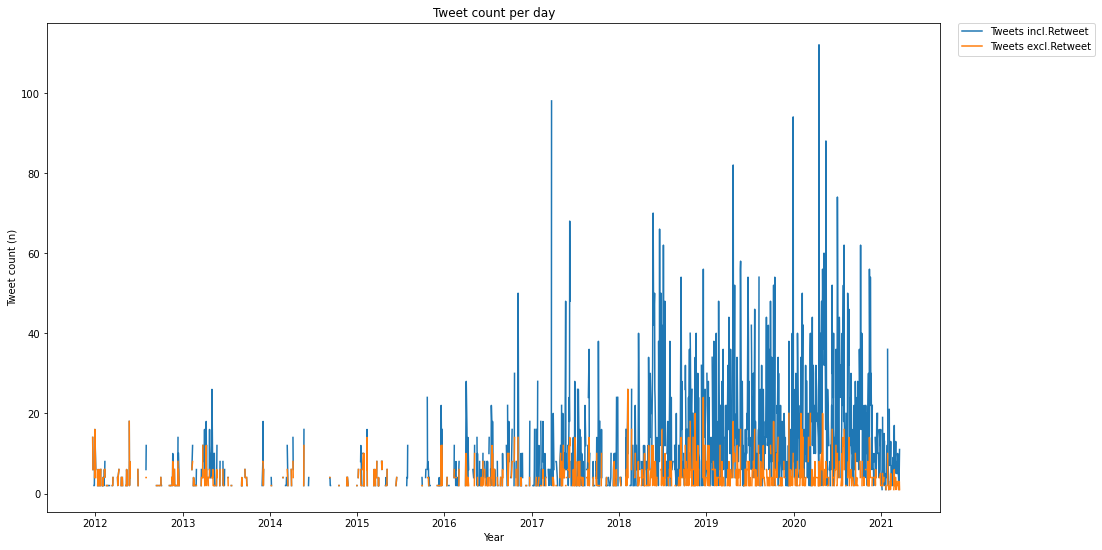

In [69]:
plt.figure(figsize = [16,9])

plt.errorbar(x = df1['date'], y = df1['tweet'], label = 'Tweets incl.Retweet')
plt.errorbar(x = df2['date'], y = df2['tweet'], label = 'Tweets excl.Retweet')

plt.legend(bbox_to_anchor=(1.02,1), loc = 'upper left', borderaxespad = 0)

plt.title('Tweet count per day')
plt.xlabel('Year')
plt.ylabel('Tweet count (n)')

plt.show()

- As the company grows, the number of tweets has proportionally increased over the period.

#### Regression with scatter plot

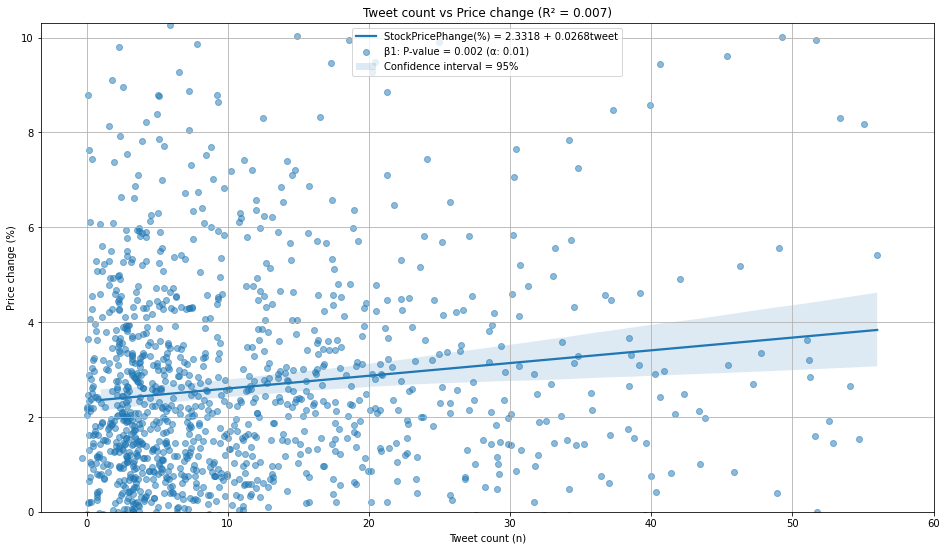

In [70]:
plt.figure(figsize = (16,9));

sb.regplot(data = df1r, x = 'tweet', y = 'price_change', x_jitter = 2, y_jitter = 2, scatter_kws = {'alpha': 1/2}, ci = 95);
plt.ylim(0,np.percentile(df1r.price_change, 97));
plt.title('Tweet count vs Price change (R² = 0.007)')
plt.xlabel('Tweet count (n)')
plt.ylabel('Price change (%)')
plt.grid(axis='x')
plt.grid(axis='y')
plt.legend(['StockPricePhange(%) = 2.3318 + 0.0268tweet', 'β1: P-value = 0.002 (α: 0.01)', 'Confidence interval = 95%'])

plt.show()

## Conclusion

`Does ELON's number of tweets affect Tesla's stock price?`

Based on the linear regression model and statistical analysis, the predicted stock price change (%) is equal to 2.3318 plus 0.0268 times the number of tweets. If there is no tweeting, we would expect the stock price to have about 2.3318% change on average. For every one-unit increase in the number of tweets, we would predict that the stock price would change by 0.0268%. However, because the R-squared is remarkably small, 0.007, only 0.7% of the variability in the stock price change is explained by the number of tweets; in other words, the remaining 99.3% of the variability is due to characteristics of the stock price change that are not the number of tweets.
Future work:
In my future work, I will go over R-squared more in detail because there are some arguments explain that R-squared may not be a great measure.